In [1]:
from PIL import Image
from pylab import *
from numpy import *

In [2]:
im_pure = array(Image.open('data/empire.jpg'),'f')
print(im_pure.shape, im_pure.dtype)


(800, 569, 3) float32


In [3]:
value=im_pure[100,60,2]

In [4]:
value

194.0

In [5]:
im = array(Image.open('data/empire.jpg').convert('L'),'f')
print(im.shape, im.dtype)

(800, 569) float32


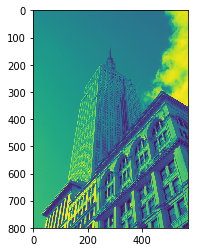

In [6]:
imshow(im)

In [7]:
im = array(Image.open('data/empire.jpg').convert('L'))

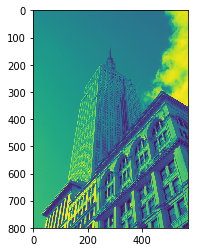

In [8]:
imshow(im)

In [9]:
im2=255-im

In [10]:
im2

array([[130, 132, 132, ...,   8,   9,   9],
       [129, 130, 130, ...,   9,   9,   9],
       [128, 129, 130, ...,   9,   9,   8],
       ...,
       [ 86,  85,  85, ..., 217, 216, 217],
       [ 86,  85,  85, ..., 216, 213, 215],
       [ 86,  84,  86, ..., 215, 216, 217]], dtype=uint8)

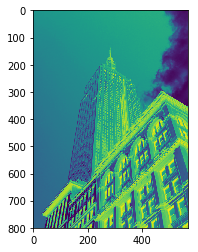

In [11]:
imshow(im2)

In [12]:
im3=(100.0/255)*im+100

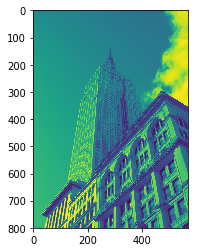

In [13]:
imshow(im3)

In [14]:
im4=255.0*(im/255.0)**2

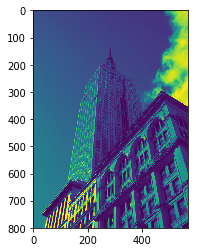

In [15]:
imshow(im4)

In [16]:
pil=Image.fromarray(uint8(im))

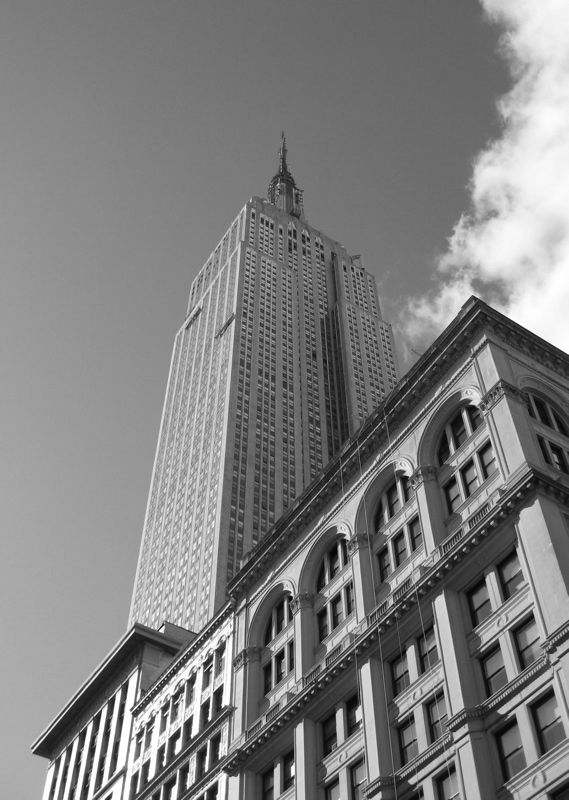

In [17]:
pil

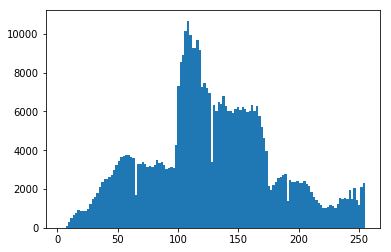

In [18]:
figure()
hist(im.flatten(),128) 
show()

In [19]:
def imResize(_im,sz):
    pil_im_resize=Image.fromarray(unit(_im))
    return array(pil_im_resize(sz))

In [20]:
def histeq(_im,nbr_bins=256):
    imhist,bins = histogram(_im.flatten(),nbr_bins,normed=True) 
    cdf = imhist.cumsum() # 累积分布函数
    cdf = 255 * cdf / cdf[-1] # 归一化
 # 基本的图像操作和处理 | 11
# 使用累积分布函数的线性插值，计算新的像素值 
    im_CDF = interp(_im.flatten(),bins[:-1],cdf)
    return im_CDF.reshape(_im.shape), cdf

In [21]:
im6 = array(Image.open('data/AquaTermi_lowcontrast.jpg').convert('L'))
im7,cdf = histeq(im6)

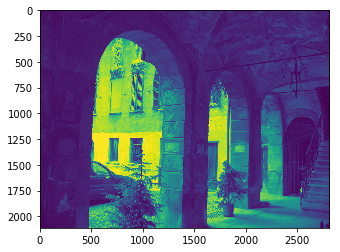

In [22]:
imshow(im6)

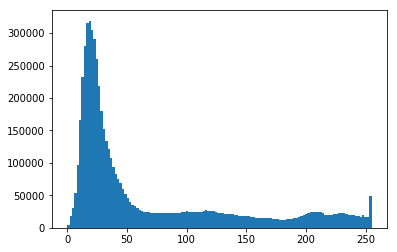

In [23]:
figure()
hist(im6.flatten(),128) 
show()

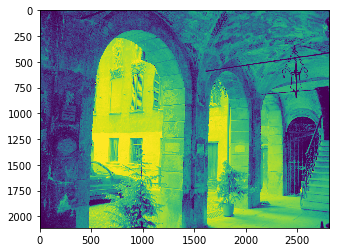

In [24]:
imshow(im7)

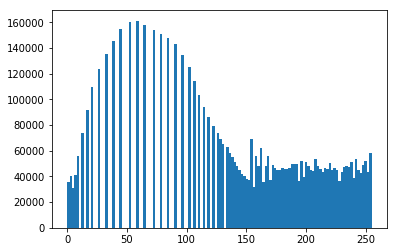

In [25]:
figure()
hist(im7.flatten(),128) 
show()

In [26]:
im7

array([[26.13585013, 12.06371213,  6.4443388 , ..., 12.06371213,
        20.78461702, 26.13585013],
       [16.04991247,  8.8631506 ,  6.4443388 , ..., 16.04991247,
        16.04991247, 12.06371213],
       [ 8.8631506 ,  6.4443388 ,  8.8631506 , ...,  8.8631506 ,
        16.04991247, 20.78461702],
       ...,
       [ 0.51920741,  0.51920741,  0.51920741, ...,  4.65252686,
         4.65252686,  3.31350784],
       [ 1.55595747,  0.51920741,  0.51920741, ...,  6.4443388 ,
         6.4443388 ,  3.31350784],
       [ 3.31350784,  1.55595747,  0.51920741, ...,  4.65252686,
         4.65252686,  2.31454897]])

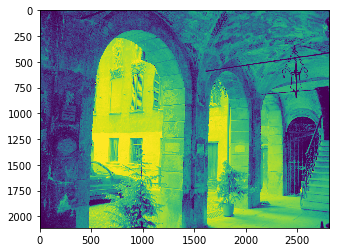

In [27]:
imshow(im7)

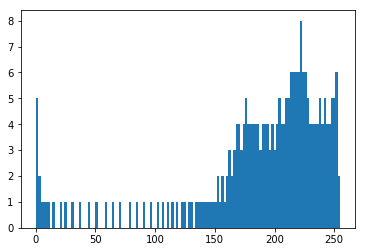

In [28]:
figure()
hist(cdf,128)
show()

In [29]:
empire_image = array(Image.open('data/empire.jpg').convert('L'))
empire_image_L,cdf_empire = histeq(empire_image)

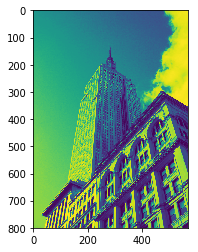

In [30]:
imshow(empire_image_L)

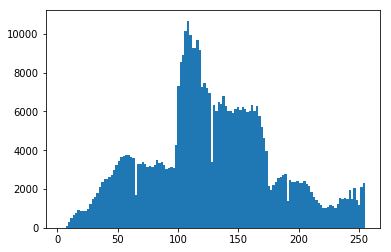

In [31]:
figure()
hist(empire_image.flatten(),128) 
show()

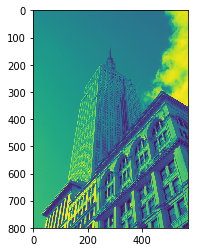

In [32]:
imshow(empire_image)

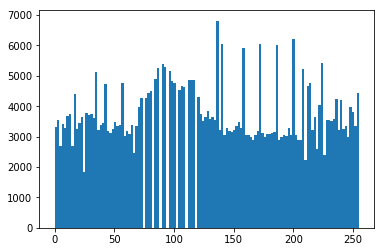

In [33]:
figure()
hist(empire_image_L.flatten(),128) 
show()

In [34]:
def compute_average(imlist): 
    #""" 计算图像列表的平均图像 """
# 打开第一幅图像，将其存储在浮点型数组中 
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
# 返回 uint8 类型的平均图像
    return array(averageim, 'uint8')

In [35]:
def pca(X):
    num_data,dim=X.shape
    mean_X=X.mean(axis=0)
    X=X-mean_x
    
    if dim>num_data:
        M=dot(X,X.T)
        e,EV=linalg.eigh(M)
        tmp=dot(X.T,EV).t
        v=tmp[::-1]
        s=sqrt(e)[::-1]
        for i in range(v.shape[1]):
            v[:,i]/=s
    else:
        u,s,v=linalg.svd(X)